# 支持向量机介绍：线性支持向量机：LinearSVC

## 1 引用

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn import svm
from sklearn import datasets
from sklearn import metrics

## 2 数据准备

In [18]:
X01, y01 = datasets.make_classification(n_features=10, random_state=0,n_samples=1000)

In [19]:
X01[:5]

array([[-1.59383951,  0.04968522,  0.67705082, -0.35734278,  1.0183731 ,
        -1.81841071, -0.05351722, -1.60184875, -0.85864335,  1.77165667],
       [ 1.76713158,  0.01131026, -0.92483092, -1.30097756, -0.17342086,
        -1.06187402, -1.86963717, -0.92546251,  0.14355207,  0.01153448],
       [ 0.00207502, -1.47516048,  0.36681095, -1.122294  ,  1.02680058,
        -0.74322754, -1.03744197,  1.01069372, -0.99950298, -0.39522207],
       [-1.41548749,  0.87832224,  0.97451291, -0.00876546,  0.31656831,
         0.55726489,  0.47196335, -1.15610287, -0.945013  ,  1.500416  ],
       [-0.57685491, -0.18744322, -0.02220035,  0.77771538, -0.37812788,
         0.36215321,  0.83353498,  0.19671992,  0.46885971, -1.78785412]])

In [20]:
y01[:20]

array([1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0])

### 2.1 数据原始分布

In [26]:
X01_2column=X01[:,2:4]

In [22]:
X01_2column[:5]

array([[-1.59383951,  0.04968522],
       [ 1.76713158,  0.01131026],
       [ 0.00207502, -1.47516048],
       [-1.41548749,  0.87832224],
       [-0.57685491, -0.18744322]])

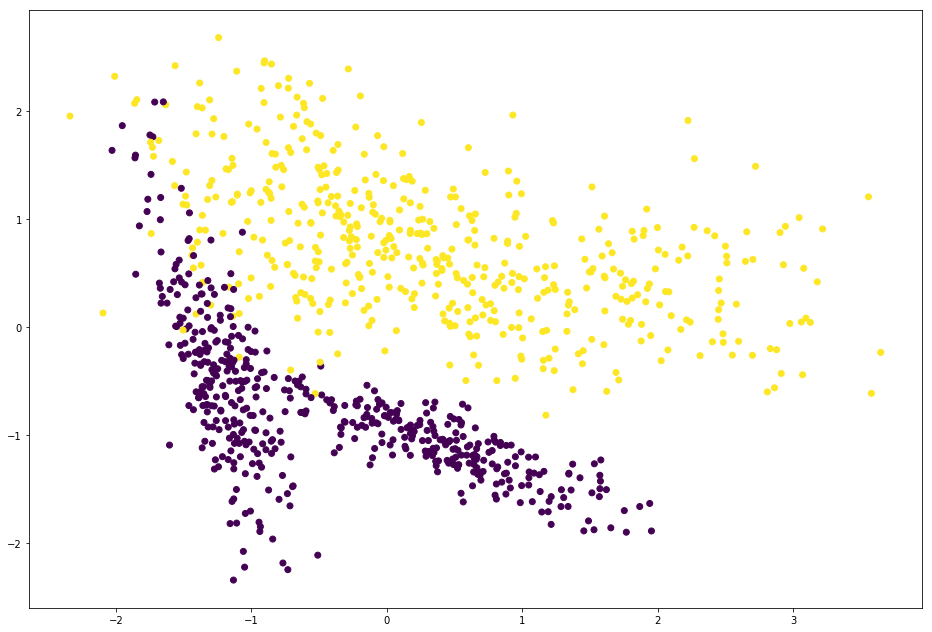

In [27]:
plt.figure(figsize=(16,11))
plt.scatter(x=X01_2column[:,0],y=X01_2column[:,1],c=y01)
plt.show()

## 3 准备模型

In [28]:
clf01 =svm.LinearSVC(random_state=0)
clf01

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=0, tol=0.0001,
     verbose=0)

#### 3.X 可以尝试不同哦参数

## 4 模型训练

#### 注意：这里提取前2列的特征数据

In [29]:
%%time
clf01.fit(X01_2column, y01)

Wall time: 6 ms


LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=0, tol=0.0001,
     verbose=0)

## 5 模型系数

### 5.1 线性系数

In [30]:
coef01=clf01.coef_
coef01

array([[ 0.84659723,  1.37800075]])

In [31]:
intercept01=clf01.intercept_
intercept01

array([ 0.21781811])

### 5.2 分类标签

In [32]:
clf01.classes_

array([0, 1])

## 6 模型预测

In [34]:
%%time
predict01= clf01.predict(X01_2column)

Wall time: 0 ns


In [35]:
predict01[:20]

array([1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0])

## 7 结果对比

In [36]:
y01[:20]

array([1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0])

### 7.1准确率

In [37]:
print '模型准确率：%f %s' % (metrics.accuracy_score(y_true=y01,y_pred=predict01)*100,'%')

模型准确率：95.400000 %


## 8 支持向量图示

### 8.1 计算坐标

In [49]:
xcoord01=np.linspace(start=-2.3,stop=2.3,num=20)
xcoord01[:5]

array([-2.3       , -2.05789474, -1.81578947, -1.57368421, -1.33157895])

In [50]:
X02=((xcoord01*-coef01[0,0]-intercept01)/coef01[0,1])
X02[:5]

array([ 1.25497429,  1.10623297,  0.95749166,  0.80875034,  0.66000903])

In [51]:
X01[:5,0]

array([-1.59383951,  1.76713158,  0.00207502, -1.41548749, -0.57685491])

### 8.2 支持向量分割线

In [52]:
w01=coef01[0]
a01=-w01[0]/w01[1]
a01

-0.61436630071000853

In [53]:
yy01=a01*xcoord01-(intercept01[0])/w01[1]
yy01[:5]

array([ 1.25497429,  1.10623297,  0.95749166,  0.80875034,  0.66000903])

In [54]:
margin01 = 1 / np.sqrt(np.sum(coef01 ** 2))
margin01

0.61831995313078136

In [55]:
yy_down01 = yy01 - np.sqrt(1 + a01 ** 2) * margin01
yy_down01[:5]

array([ 0.52928528,  0.38054396,  0.23180265,  0.08306133, -0.06567998])

In [56]:
yy_up01 = yy01 + np.sqrt(1 + a01 ** 2) * margin01
yy_up01[:5]

array([ 1.98066329,  1.83192198,  1.68318066,  1.53443935,  1.38569803])

## 9 画图

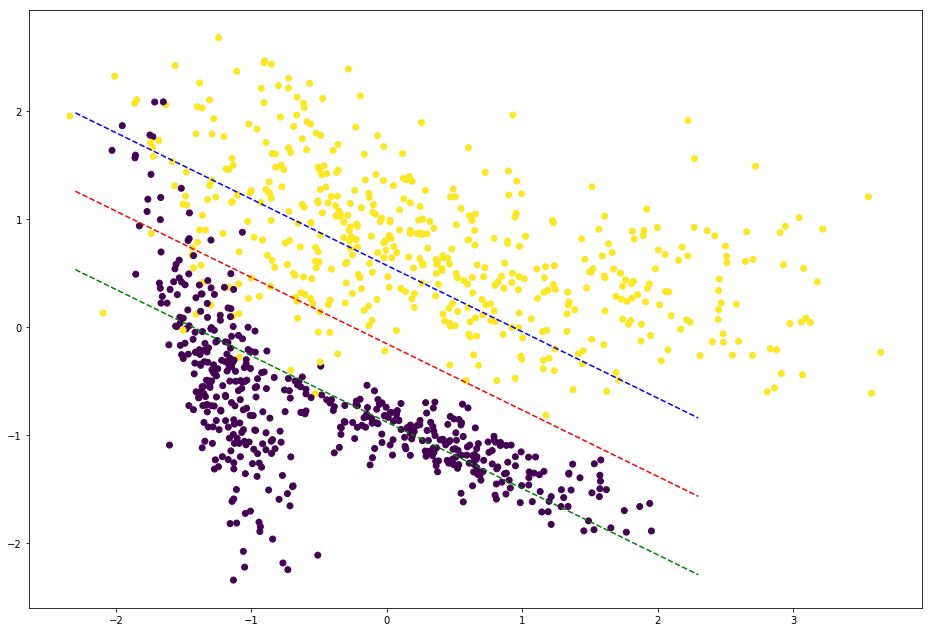

In [57]:
plt.figure(figsize=(16,11))
#数据点
plt.scatter(x=X01_2column[:,0],y=X01_2column[:,1],c=y01)
#逻辑回归线
plt.plot(xcoord01,X02,"k--",c="r")
#支持向量区间线
plt.plot(xcoord01,yy_up01,"k--",c="b")
plt.plot(xcoord01,yy_down01,"k--",c="g")
plt.show()

In [6]:
np.info(datasets.make_classification)

 make_classification(n_samples=100, n_features=20, n_informative=2,
                     n_redundant=2, n_repeated=0, n_classes=2,
                     n_clusters_per_class=2, weights=None, flip_y=0.01,
                     class_sep=1.0, hypercube=True, shift=0.0, scale=1.0,
                     shuffle=True, random_state=None)

Generate a random n-class classification problem.

This initially creates clusters of points normally distributed (std=1)
about vertices of a `2 * class_sep`-sided hypercube, and assigns an equal
number of clusters to each class. It introduces interdependence between
these features and adds various types of further noise to the data.

Prior to shuffling, `X` stacks a number of these primary "informative"
features, "redundant" linear combinations of these, "repeated" duplicates
of sampled features, and arbitrary noise for and remaining features.

Read more in the :ref:`User Guide <sample_generators>`.

Parameters
----------
n_samples : int, optional (default=10